In [256]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [257]:
pd.options.display.max_columns = None

In [258]:
train = pd.read_csv("./train.csv")
test = pd.read_csv("./test.csv")

In [259]:
train.head()

,Churn,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,No,8259-DZLIZ,Female,0,Yes,Yes,64,Yes,Yes,DSL,No,Yes,No,No,No,No,One year,Yes,Bank transfer (automatic),53.85,3399.85
1,No,1764-VUUMT,Male,0,No,Yes,66,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),19.95,1269.1
2,Yes,1320-HTRDR,Female,0,No,No,3,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,75.50,220.6
3,No,1047-RNXZV,Male,0,No,No,43,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.55,876.15
4,No,0513-RBGPE,Male,0,Yes,Yes,37,Yes,Yes,DSL,Yes,No,Yes,Yes,No,No,Two year,Yes,Credit card (automatic),62.80,2278.75


In [260]:
test.head()

,Churn,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,No,1985-MBRYP,Female,0,No,No,43,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),19.65,779.25
1,No,4878-BUNFV,Male,0,Yes,Yes,42,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.70,828.85
2,No,8728-SKJLR,Male,0,No,No,41,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,74.25,3089.1
3,Yes,7931-PXHFC,Male,0,No,No,38,Yes,No,DSL,No,No,Yes,Yes,No,Yes,One year,Yes,Mailed check,62.30,2354.8
4,Yes,2057-ZBLPD,Female,0,Yes,No,21,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,86.50,1808.7


In [261]:
train = train.drop(columns=['customerID'])
test = test.drop(columns=['customerID'])

In [280]:
train = train[train.TotalCharges != " "]


,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges


In [145]:
df["TotalCharges"]=df["TotalCharges"].apply(lambda x: float(x) if len(x)>1 else np.nan)

In [146]:
df.isna().sum().sum()

10

In [147]:
df.loc[df["TotalCharges"].isna(),["tenure","MonthlyCharges", "TotalCharges"]]

,tenure,MonthlyCharges,TotalCharges
4,0,61.90,NaN
282,0,56.05,NaN
2419,0,25.35,NaN
2734,0,19.70,NaN
2903,0,19.85,NaN
3974,0,80.85,NaN
5023,0,20.25,NaN
5030,0,20.00,NaN
5343,0,52.55,NaN
5599,0,25.75,NaN


array([[<AxesSubplot:title={'center':'SeniorCitizen'}>,
        <AxesSubplot:title={'center':'tenure'}>],
       [<AxesSubplot:title={'center':'MonthlyCharges'}>,
        <AxesSubplot:title={'center':'TotalCharges'}>]], dtype=object)

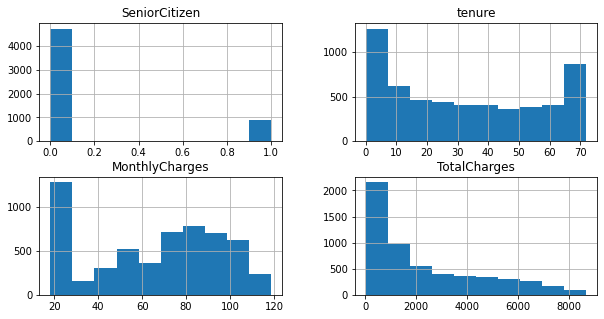

In [148]:
df.hist(figsize=(10,5))

In [161]:
df.gender.unique()
plt.figure(figsize=(6,10))

<Figure size 432x720 with 0 Axes>

<Figure size 432x720 with 0 Axes>

dtype('float64')

<AxesSubplot:>

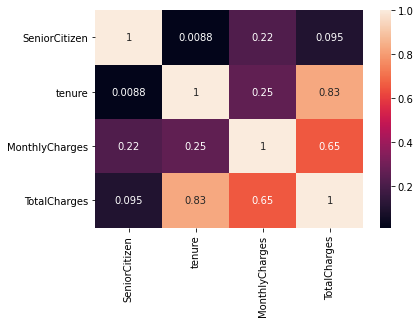

<Figure size 576x432 with 0 Axes>

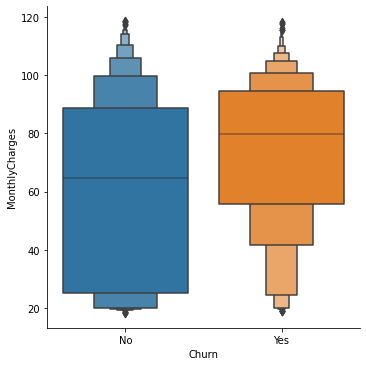

In [218]:
plt.figure(figsize=(8,6))
sns.catplot(x='Churn', y='MonthlyCharges', data=df, kind="boxen")

sns.factorplot(x='Churn', y='tenure', data=df, kind="box")

In [213]:
#sns.catplot(x='Churn', y='TotalCharges', data=df, kind="violin")

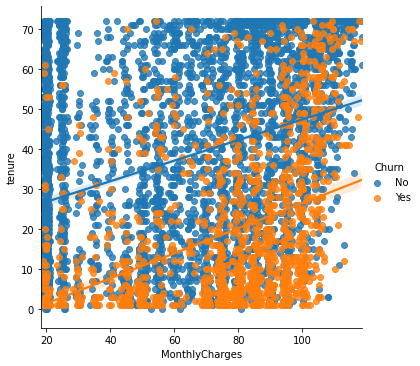

In [211]:
sns.lmplot(x='MonthlyCharges', y='tenure', hue='Churn', data=df)

C:\Users\Jacopo\AppData\Roaming\Python\Python39\site-packages\seaborn\categorical.py:1296: UserWarning: 78.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Jacopo\AppData\Roaming\Python\Python39\site-packages\seaborn\categorical.py:1296: UserWarning: 50.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Churn', ylabel='tenure'>

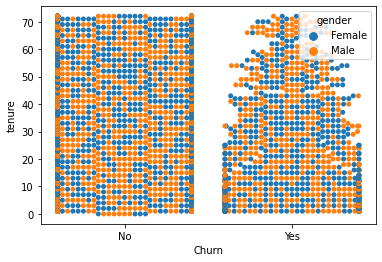

In [281]:
train.StreamingTV

0                        No
1       No internet service
2                        No
3       No internet service
4                        No
               ...         
4220                     No
4221                    Yes
4222    No internet service
4223                    Yes
4224                     No
Name: StreamingTV, Length: 4216, dtype: object

In [282]:
train.StreamingTV = train.StreamingTV.map(lambda el: 1 if el == 'Yes' else 0)

<AxesSubplot:xlabel='StreamingTV', ylabel='count'>

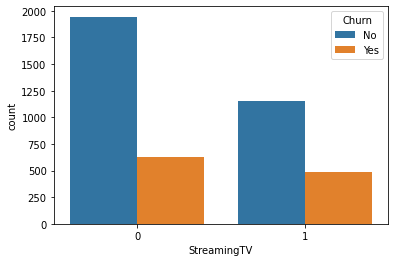

In [284]:
sns.(x='StreamingTV', hue='Churn', data=train)

In [310]:
train[['Partner', 'Churn']]

,Partner,Churn
0,Yes,No
1,No,No
2,No,Yes
3,No,No
4,Yes,No
...,...,...
4220,Yes,No
4221,Yes,Yes
4222,No,No
4223,No,Yes


In [306]:
#